# Exploring kaggle dataset: 120 years of Olympic history: athletes and results
***containing:*** bio data on athletes and medal results from Athens 1896 to Rio 2016

## Contents of notebook:
- [ ] insert links here

***Ideas/thoughts to investigate:***
- [ ] Russian medal winning over time (in light of doping scandals)
- [ ] Medal winners per capita
- [ ] Medal winners normalised for: total entrants; population; GDP; etc.
    * will have to look at year on year GDP of countries
- [ ] Separate consideration on summer and winter olympics
- [ ] review the variation of sports in the olympics, make this consistent
- [ ] best performaning countries normalised to number of entrants

***Notes:***
* Winter olympics started in  1924
* Following 1992 winter and summer olympics were no longer held on the same year

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# increase width of cells in notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.rcParams["figure.dpi"] = 130
plt.rcParams["figure.figsize"] = (8,4)

## Parsing .csv's to dataframes, and previewing

In [5]:
events_df = pd.read_csv('./data/athlete_events.csv')
regions_df = pd.read_csv('./data/noc_regions.csv')

In [6]:
print(events_df.shape)
events_df.head()

(271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
events_df.info()

# result: missing values for: height, weight, age and medals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
ID        271116 non-null int64
Name      271116 non-null object
Sex       271116 non-null object
Age       261642 non-null float64
Height    210945 non-null float64
Weight    208241 non-null float64
Team      271116 non-null object
NOC       271116 non-null object
Games     271116 non-null object
Year      271116 non-null int64
Season    271116 non-null object
City      271116 non-null object
Sport     271116 non-null object
Event     271116 non-null object
Medal     39783 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [8]:
events_df.describe()

# max age: 97? -- investigate this further
# min age: 10 -- investigate

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
print(regions_df.shape)
regions_df.head()

# result: this maps NOC code to a region, with notes

(230, 3)


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [10]:
regions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
NOC       230 non-null object
region    227 non-null object
notes     21 non-null object
dtypes: object(3)
memory usage: 5.5+ KB


### Merging events_df and regions_df

In [11]:
print(events_df.columns)
print(regions_df.columns)

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')
Index(['NOC', 'region', 'notes'], dtype='object')


In [12]:
merged_df = events_df.merge(regions_df, on='NOC', how='outer')

In [13]:
merged_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1.0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2.0,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602.0,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000.0,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463.0,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004.0,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464.0,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016.0,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


## Reviewing missing data in the dataset
* data missing for:
    * height
    * weight
    * medals
    
To start, let's check the years where there exists missing data

In [14]:
# height
merged_df[merged_df['Height'].isnull()]['Year'].unique()

array([1936., 1948., 1980., 1984., 1992., 2008., 1988., 1932., 1994.,
       1998., 1996., 2002., 1952., 1920., 1900., 1908., 1928., 1912.,
       1956., 1906., 1924., 1960., 1896., 2014., 1972., 1976., 1964.,
       1904., 2016., 2000., 2004., 1968., 2012., 2006., 2010.,   nan])

In [15]:
# weight 
merged_df[merged_df['Weight'].isnull()]['Year'].unique()

array([1980., 1984., 1936., 2002., 1948., 1992., 2008., 1988., 1932.,
       1994., 1998., 1996., 1952., 1920., 1900., 1908., 1928., 1912.,
       1956., 1906., 1924., 1972., 2012., 2014., 1960., 1896., 1976.,
       1964., 1904., 2016., 2006., 2000., 2004., 1968., 2010.,   nan])

In [16]:
# medals
merged_df[merged_df['Medal'].isnull()]['Year'].unique()

array([1992., 2012., 2000., 2004., 2016., 2006., 1998., 2008., 1996.,
       2014., 1984., 1936., 1980., 1988., 2010., 2002., 1948., 1994.,
       1932., 1952., 1920., 1908., 1972., 1928., 1956., 1912., 1960.,
       1924., 1964., 1976., 1968., 1906., 1900., 1896., 1904.,   nan])

### Is it possible to calculate how many medals should have been awarded at each olympics, given the Events list?
(Doing this will allow us to guage how much of the medal data is missing.)

***summary of findings:***
* cannot simply take Events and multiply by 3 to get total medals
* there are team sports where the no. of medals is >3

In [17]:
# checking the events held per year, could use this as an indicator for how many medals SHOULD have been awarded
events_group = merged_df.groupby('Year')['Event'].unique()
events_group.head()

Year
1896.0    [Weightlifting Men's Unlimited, One Hand, Weig...
1900.0    [Tug-Of-War Men's Tug-Of-War, Fencing Men's Fo...
1904.0    [Rowing Men's Coxed Eights, Golf Men's Individ...
1906.0    [Football Men's Football, Gymnastics Men's Tea...
1908.0    [Athletics Men's Hammer Throw, Wrestling Men's...
Name: Event, dtype: object

In [18]:
# assuming bronze, silver and gold is awarded for every event
num_of_events = {}
for ix, events in enumerate(events_group.values, 0):
    # multiply by 3 for bronze, silver, gold
    year = events_group.index[ix]
    num_of_events[year] = len(events) * 3
print(num_of_events)

{1896.0: 129, 1900.0: 270, 1904.0: 285, 1906.0: 222, 1908.0: 327, 1912.0: 321, 1920.0: 474, 1924.0: 444, 1928.0: 408, 1932.0: 435, 1936.0: 501, 1948.0: 525, 1952.0: 513, 1956.0: 525, 1960.0: 531, 1964.0: 591, 1968.0: 621, 1972.0: 684, 1976.0: 705, 1980.0: 723, 1984.0: 780, 1988.0: 849, 1992.0: 942, 1994.0: 183, 1996.0: 813, 1998.0: 204, 2000.0: 900, 2002.0: 234, 2004.0: 903, 2006.0: 252, 2008.0: 906, 2010.0: 258, 2012.0: 906, 2014.0: 294, 2016.0: 918}


In [19]:
# medals

merged_df.groupby('Year')['Medal'].value_counts(dropna=False)

# result: NaN's mean no medal OR maybe missing data, and there isn't an even award of gold, silver, bronze
# uneven award of medals may be down to ties?

Year    Medal 
1896.0  NaN         237
        Gold         62
        Silver       43
        Bronze       38
1900.0  NaN        1332
        Silver      228
        Gold        201
        Bronze      175
1904.0  NaN         815
        Gold        173
        Silver      163
        Bronze      150
1906.0  NaN        1275
        Gold        157
        Silver      156
        Bronze      145
1908.0  NaN        2270
        Gold        294
        Silver      281
        Bronze      256
1912.0  NaN        3099
        Gold        326
        Silver      315
        Bronze      300
1920.0  NaN        2984
        Gold        493
        Silver      448
        Bronze      367
1924.0  NaN        4731
        Gold        332
                  ...  
2002.0  Bronze      159
        Silver      157
2004.0  NaN       11442
        Bronze      677
        Gold        664
        Silver      660
2006.0  NaN        3856
        Gold        176
        Bronze      175
        Silver      175
2

In [20]:
# checking events
events_group.iloc[-1]

# result: no trivial way of estimating how many medals are should have been awarded given Events
# this is because some events are team events, wherein many medals are awarded to whole teams

array(["Swimming Women's 200 metres Freestyle",
       "Swimming Women's 4 x 200 metres Freestyle Relay",
       "Triathlon Men's Olympic Distance",
       "Rhythmic Gymnastics Women's Group",
       "Wrestling Men's Light-Heavyweight, Freestyle",
       "Athletics Women's Shot Put", "Athletics Men's 20 kilometres Walk",
       "Archery Women's Individual", "Archery Women's Team",
       "Athletics Men's Triple Jump",
       "Shooting Men's Air Rifle, 10 metres",
       "Shooting Men's Small-Bore Rifle, Prone, 50 metres",
       "Diving Men's Springboard",
       "Diving Men's Synchronized Springboard",
       "Swimming Women's 400 metres Freestyle",
       "Modern Pentathlon Men's Individual", "Badminton Men's Doubles",
       "Diving Men's Platform", "Diving Men's Synchronized Platform",
       "Shooting Women's Trap", "Fencing Men's Foil, Individual",
       "Fencing Men's Foil, Team",
       "Swimming Women's 200 metres Backstroke",
       "Weightlifting Men's Featherweight", "Badm

### Visualising medal data:

Text(0,0.5,'Count')

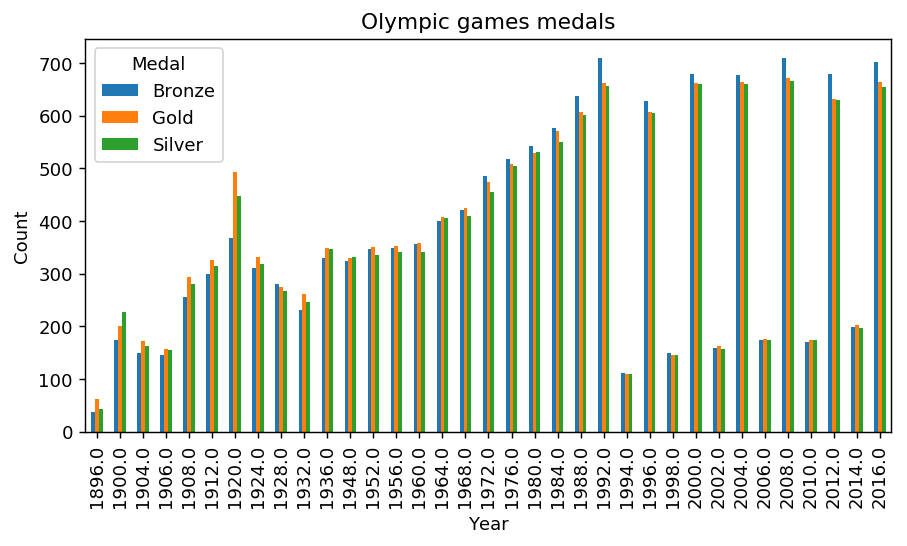

In [242]:
merged_df.groupby('Year')['Medal'].value_counts().unstack().plot(kind='bar')
plt.title('Olympic games medals')
plt.ylabel('Count')

# result: following 1992 the winter and summer olympics are held on different years -- we can combine these easily

Text(0,0.5,'Count')

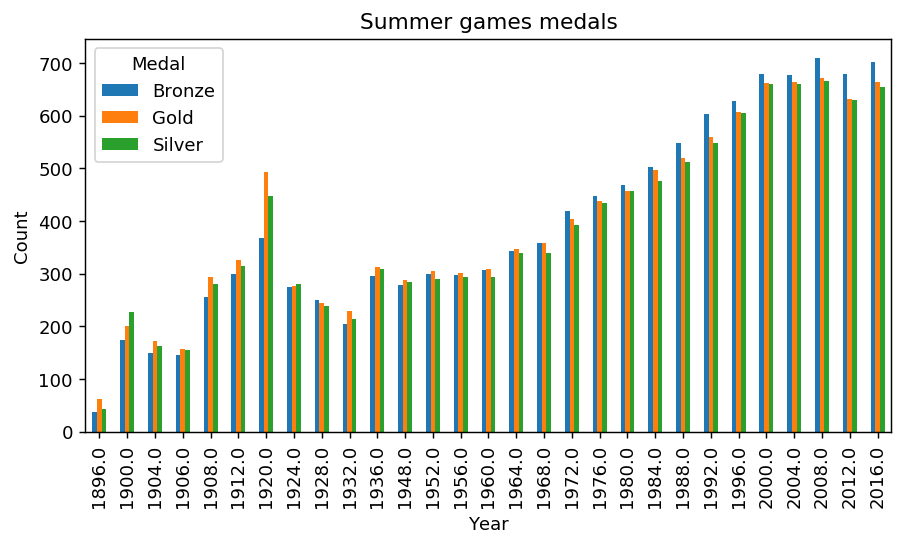

In [241]:
merged_df[merged_df['Season']=='Summer'].groupby('Year')['Medal'].value_counts().unstack().plot(kind='bar')
plt.title('Summer games medals')
plt.ylabel('Count')

Text(0,0.5,'Count')

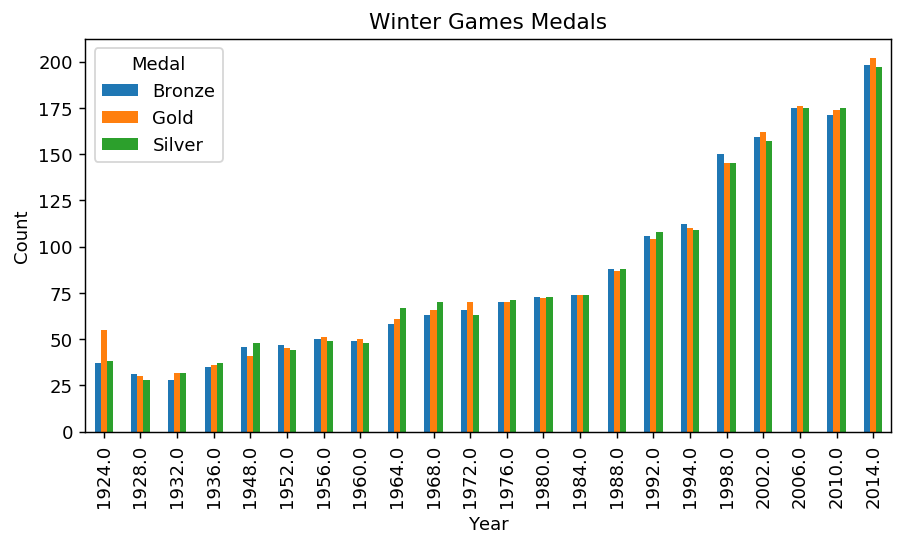

In [243]:
merged_df[merged_df['Season']=='Winter'].groupby('Year')['Medal'].value_counts().unstack().plot(kind='bar')
plt.title('Winter Games Medals')
plt.ylabel('Count')

### what is the age distribution of medalists and how does this compare to the age distribution of all athletes?

In [132]:
# TODO: first, checking missing age values


25.556898357297374
weighted avg age of all atheletes: 25.556898357297374


Text(0,0.5,'Count')

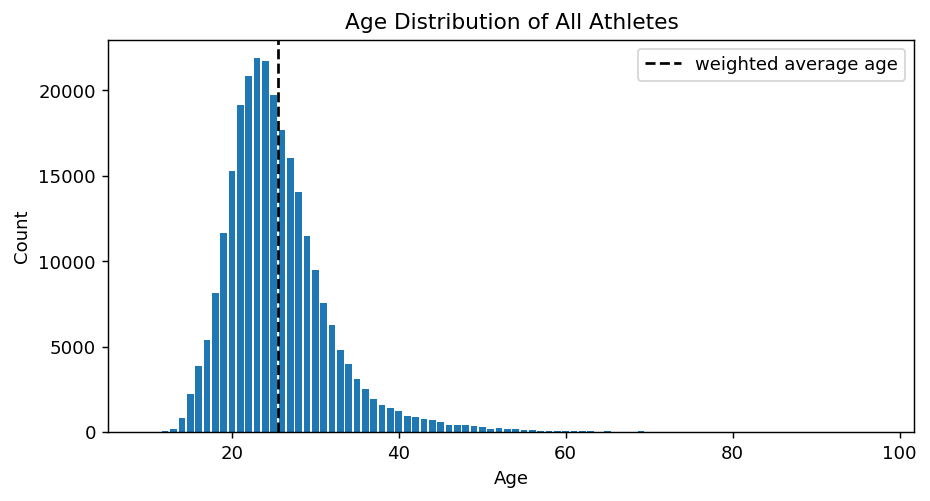

In [25]:
# age distribution of all athletes
all_age = merged_df[(merged_df['Age'].notnull())]['Age'].value_counts()

# weighted average
avg_age_all = np.average(all_age.index, weights=all_age.values)

print(avg_age_all)

print('weighted avg age of all atheletes:', avg_age_all)

# plotting
plt.bar(all_age.index, all_age.values)
plt.title('Age Distribution of All Athletes')
plt.xlabel('Age')
plt.axvline(x=avg_age_all, color='k', linestyle='--', label='weighted average age')
plt.legend()
plt.ylabel('Count')

weighted avg age of all medalists: 25.925174771452717
weighted avg age of gold: 25.901013309134907
weight avg age of silver: 25.99672412448327
weight avg age of bronze: 25.879209595571275


Text(0,0.5,'Count')

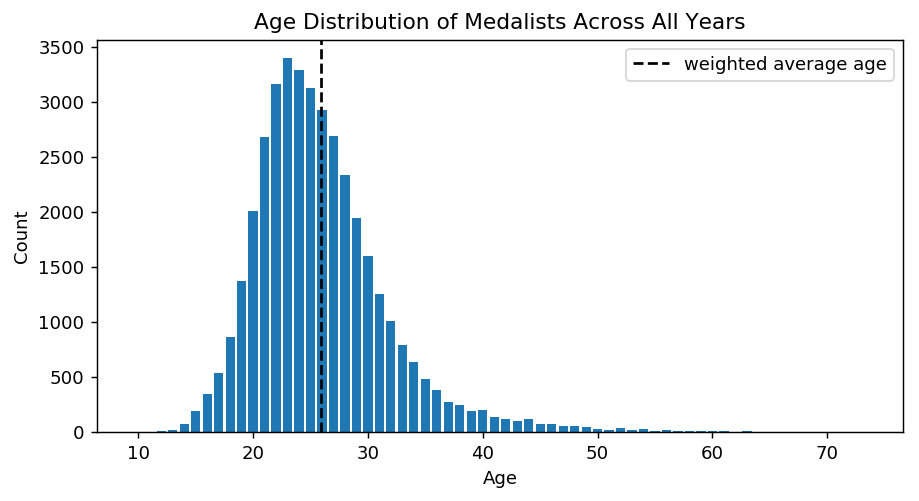

In [26]:
# age of medalists, for all years
medalists_all = merged_df[(merged_df['Medal'].notnull()) & (merged_df['Age'].notnull())]
# gold
medalists_gold = medalists_all[(medalists_all['Medal']=='Gold')]
# silver
medalists_silver = medalists_all[(medalists_all['Medal']=='Silver')]
# bronze
medalists_bronze = medalists_all[(medalists_all['Medal']=='Bronze')]


medalists_all_age = medalists_all['Age'].value_counts()
medalists_gold_age = medalists_gold['Age'].value_counts()
medalists_silver_age = medalists_silver['Age'].value_counts()
medalists_bronze_age = medalists_bronze['Age'].value_counts()

# weighted average
avg_age_all = np.average(medalists_all_age.index, weights=medalists_all_age.values)
avg_age_gold = np.average(medalists_gold_age.index, weights=medalists_gold_age.values)
avg_age_silver = np.average(medalists_silver_age.index, weights=medalists_silver_age.values)
avg_age_bronze = np.average(medalists_bronze_age.index, weights=medalists_bronze_age.values)

print('weighted avg age of all medalists:', avg_age_all)
print('weighted avg age of gold:', avg_age_gold)
print('weight avg age of silver:', avg_age_silver)
print('weight avg age of bronze:', avg_age_bronze)

# plotting
plt.bar(medalists_all_age.index, medalists_all_age.values)
# plt.bar(medalists_gold_age.index, medalists_gold_age.values, label='gold', alpha=0.5)
# plt.bar(medalists_silver_age.index, medalists_silver_age.values, label='silver', alpha=0.5)
# plt.bar(medalists_bronze_age.index, medalists_bronze_age.values, label='bronze', alpha=0.5)
plt.title('Age Distribution of Medalists Across All Years')
plt.xlabel('Age')
plt.axvline(x=avg_age_all, color='k', linestyle='--', label='weighted average age')
plt.legend()
plt.ylabel('Count')

In [27]:
merged_df['Sex'].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

Text(0,0.5,'Count')

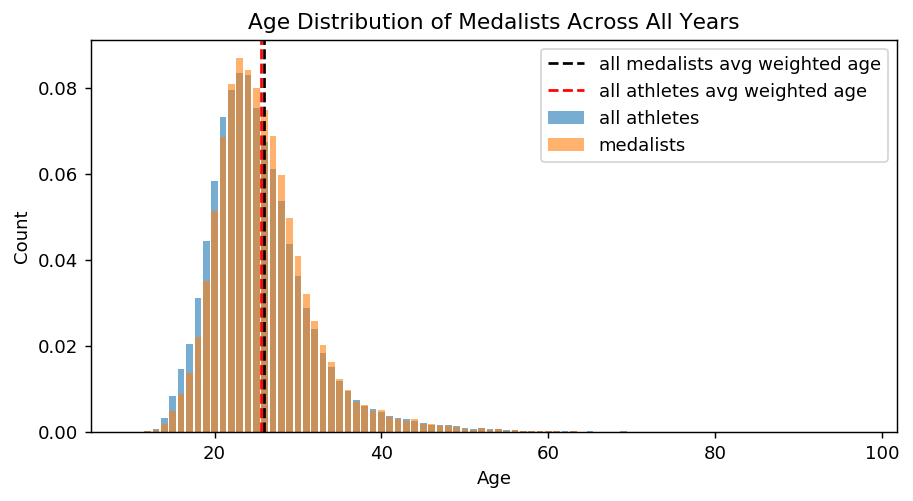

In [28]:
# normalising and overlaying age distributions

all_age = merged_df[(merged_df['Age'].notnull())]['Age'].value_counts(normalize=True)
medalists_all_age = medalists_all['Age'].value_counts(normalize=True)

plt.bar(all_age.index, all_age.values, label='all athletes', alpha=0.6)
plt.bar(medalists_all_age.index, medalists_all_age.values, label='medalists', alpha=0.6)


avg_age_medalists = np.average(medalists_all_age.index, weights=medalists_all_age.values)
avg_age_all = np.average(all_age.index, weights=all_age.values)

plt.title('Age Distribution of Medalists Across All Years')
plt.xlabel('Age')
plt.axvline(x=avg_age_medalists, color='k', linestyle='--', label='all medalists avg weighted age')
plt.axvline(x=avg_age_all, color='r', linestyle='--', label='all athletes avg weighted age')
plt.legend()
plt.ylabel('Count')

# result, medalists are actually marginally older, but no significant difference. will need to explore this further per year.

Text(0,0.5,'Count')

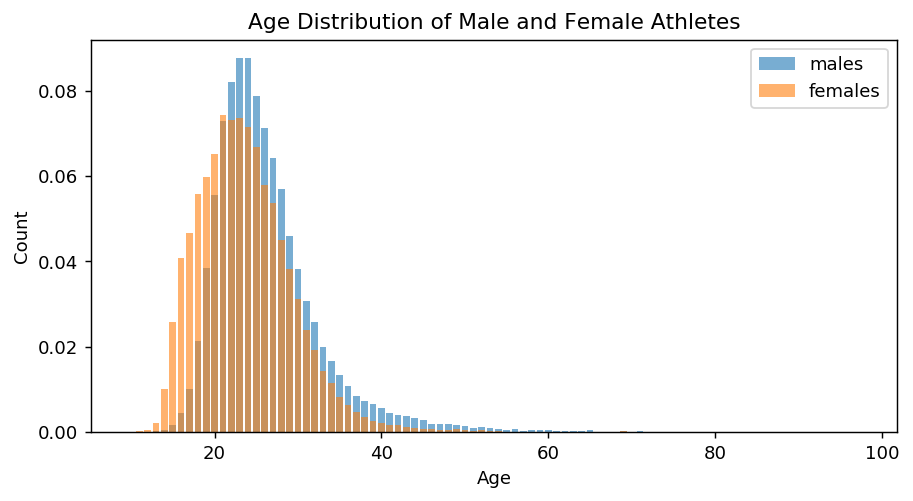

In [29]:
# comparing age distribution of males and females entrants and medalists

# normalise=True to account for discrepancy in male and female involvement
all_age_male = merged_df[(merged_df['Age'].notnull()) & (merged_df['Sex']=='M')]['Age'].value_counts(normalize=True)
all_age_female = merged_df[(merged_df['Age'].notnull()) & (merged_df['Sex']=='F')]['Age'].value_counts(normalize=True)

plt.bar(all_age_male.index, all_age_male.values, label='males', alpha=0.6)
plt.bar(all_age_female.index, all_age_female.values, label='females', alpha=0.6)
plt.title('Age Distribution of Male and Female Athletes')
plt.xlabel('Age')
plt.legend()
plt.ylabel('Count')

### Male & Female Involvement and their age distributions over time

In [220]:
male_df = events_df[events_df['Sex']=='M']
female_df = events_df[events_df['Sex']=='F']

In [227]:
male_count = male_df.groupby('Year')['ID'].count()
female_count = female_df.groupby('Year')['ID'].count()

In [271]:
# adding 0 count to 1896, since no females
female_count = female_count.append(pd.Series([0], index=[1896])).sort_index()

In [283]:
# male to female ratio
ratio = female_count / male_count

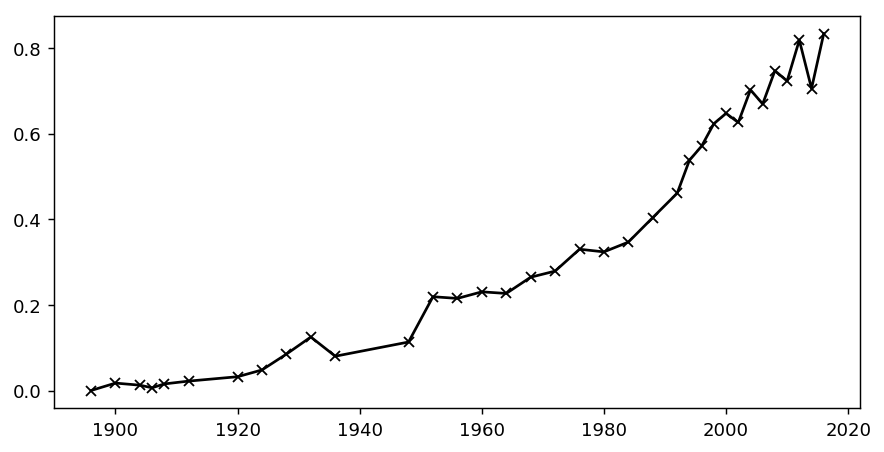

In [290]:
plt.plot(ratio, 'x-', label='female to male ratio', color='k')

# Result: approaching 1.
# there are 2 increases between 1920-1940 and 1940-1950; could this be because of world war 1 and 2?

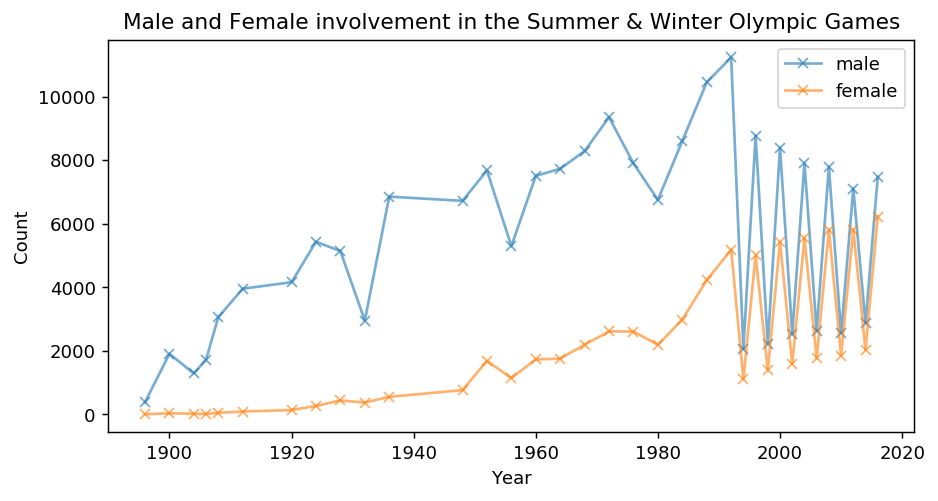

In [281]:
plt.plot(male_count.index, male_count.values, 'x-', label='male', alpha=0.6)
plt.plot(female_count.index, female_count.values, 'x-', label='female', alpha=0.6)
plt.title('Male and Female involvement in the Summer & Winter Olympic Games')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend()

### Exploring the extreme ages further
* max age = 97
* min age = 10

In [32]:
events_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [35]:
# min age
events_df[events_df['Age']==10]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
142882,71691,Dimitrios Loundras,M,10.0,NaN,NaN,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


In [36]:
# max age
events_df[events_df['Age']==97]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
257054,128719,John Quincy Adams Ward,M,97.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN


In [47]:
# other young athletes (<=16 years)
under_16 = events_df[events_df['Age']<=16]
under_16.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
204,97,Carlos Alberto Abaunza,M,16.0,180.0,70.0,Nicaragua,NCA,1976 Summer,1976,Summer,Montreal,Athletics,Athletics Men's High Jump,NaN
265,137,Giordano Giulio Abbondati,M,15.0,175.0,64.0,Italy,ITA,1964 Winter,1964,Winter,Innsbruck,Figure Skating,Figure Skating Men's Singles,NaN


In [48]:
# top 10 sports:
under_16['Sport'].value_counts().iloc[:10]

Swimming               2898
Gymnastics             2646
Figure Skating          239
Athletics               196
Alpine Skiing           194
Diving                  164
Rhythmic Gymnastics     124
Rowing                   99
Speed Skating            69
Ski Jumping              53
Name: Sport, dtype: int64

In [58]:
# since age ditribution is skewed towards younger ages, the threshold for old athletes needs to be higher

# other old athletes (>=70 years)
over_60 = events_df[events_df['Age']>=60]
print(over_60.shape)
over_60.head(2)

(658, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2392,1337,Olof Ahlberg,M,71.0,NaN,NaN,Sweden,SWE,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
3944,2278,Emilio lava Sautu,M,63.0,NaN,NaN,Spain,ESP,1952 Summer,1952,Summer,Helsinki,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NaN


In [61]:
over_60['Sport'].value_counts()

# result: art competitions were the most popular amongst old participants

Art Competitions    508
Shooting             57
Equestrianism        41
Sailing              28
Archery              19
Fencing               3
Rowing                1
Roque                 1
Name: Sport, dtype: int64

In [92]:
# years where/when were the art competitions
print('years when art competitions were held:', np.sort(events_df[events_df['Sport']=='Art Competitions']['Year'].unique()))

# number of art events
events_df[events_df['Sport']=='Art Competitions']['Year'].value_counts()

years when art competitions were held: [1912 1920 1924 1928 1932 1936 1948]


1932    1124
1936     813
1928     808
1948     471
1924     318
1912      33
1920      11
Name: Year, dtype: int64

In [298]:
events_df[events_df['Sport']=='Art Competitions']['Age'].dropna()

# result: about 500 missing age values for the ~3500 participants

58        54.0
669       45.0
670       45.0
1203      55.0
1251      27.0
1252      27.0
1374      49.0
1522      48.0
2392      71.0
2709      45.0
2710      50.0
2759      50.0
4281      48.0
4282      48.0
4283      48.0
4861      43.0
4862      43.0
4863      43.0
4864      43.0
4865      47.0
4866      51.0
4867      51.0
5104      46.0
5105      46.0
5106      46.0
5304      47.0
5324      26.0
5325      26.0
6009      32.0
6689      32.0
          ... 
267934    41.0
267935    41.0
267936    41.0
267937    41.0
267938    41.0
267939    41.0
267940    41.0
267941    41.0
267942    41.0
267943    41.0
267944    45.0
267951    36.0
268061    38.0
268241    23.0
268336    38.0
269650    47.0
269992    46.0
269993    46.0
269994    46.0
269995    46.0
269996    46.0
269997    46.0
269998    49.0
269999    49.0
270199    58.0
270200    58.0
270352    45.0
270561    44.0
270955    41.0
271034    36.0
Name: Age, Length: 3071, dtype: float64

In [93]:
# where were the art competitions?
events_df[events_df['Sport']=='Art Competitions']['City'].value_counts()

Los Angeles    1124
Berlin          813
Amsterdam       808
London          471
Paris           318
Stockholm        33
Antwerpen        11
Name: City, dtype: int64

In [107]:
# what events were held for the art competitions?
events_df[events_df['Sport']=='Art Competitions']['Event'].value_counts()

Art Competitions Mixed Painting, Unknown Event                    1074
Art Competitions Mixed Sculpturing, Unknown Event                  452
Art Competitions Mixed Painting, Paintings                         309
Art Competitions Mixed Sculpturing, Statues                        203
Art Competitions Mixed Architecture, Architectural Designs         190
Art Competitions Mixed Architecture, Designs For Town Planning     163
Art Competitions Mixed Sculpturing                                 162
Art Competitions Mixed Architecture, Unknown Event                 150
Art Competitions Mixed Painting, Drawings And Water Colors         145
Art Competitions Mixed Painting                                    112
Art Competitions Mixed Painting, Graphic Arts                       83
Art Competitions Mixed Painting, Applied Arts                       75
Art Competitions Mixed Literature                                   60
Art Competitions Mixed Music                                        53
Art Co

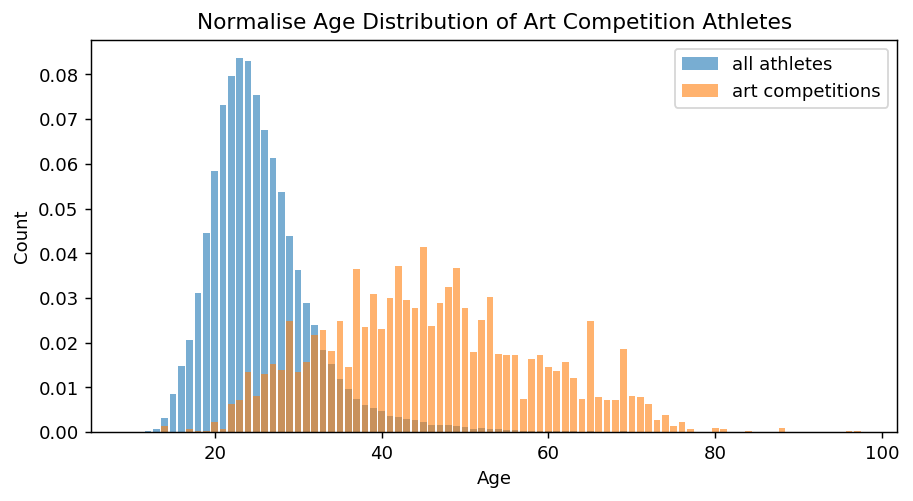

In [299]:
# on the subject of art competitions, what is the age distribution of the participants?
art_age = events_df[events_df['Sport']=='Art Competitions']['Age'].value_counts(normalize=True)

# TODO: change to histogram and account for NaN values

# plotting
plt.bar(all_age.index, all_age.values, label='all athletes', alpha=0.6)
plt.bar(art_age.index, art_age.values, label='art competitions', alpha=0.6)
plt.title('Normalise Age Distribution of Art Competition Athletes')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

In [324]:
# what country most successfull at the art competitions?
events_df[(events_df['Sport']=='Art Competitions') & (events_df['Medal'].notnull())]['Team'].value_counts()

Germany           26
France            15
Italy             14
Austria           10
Denmark            9
United States      9
Switzerland        9
Great Britain      9
Poland             8
Belgium            8
Netherlands        7
Finland            5
Hungary            5
Sweden             4
Luxembourg         3
Czechoslovakia     3
Ireland            3
South Africa       2
Japan              2
Canada             2
Monaco             1
Norway             1
Greece             1
Name: Team, dtype: int64

In [325]:
# reviewing the Berlin art competition further
berlin_art = events_df[(events_df['Sport']=='Art Competitions') & (events_df['City']=='Berlin')]
berlin_art.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4866,2777,Hermann Reinhard Alker,M,51.0,NaN,NaN,Germany,GER,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",NaN
4867,2777,Hermann Reinhard Alker,M,51.0,NaN,NaN,Germany,GER,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",NaN
5304,3002,"Kasper Angarius ""Ansgar"" Almquist",M,47.0,NaN,NaN,Sweden,SWE,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
6009,3375,Sndor Ambrzy,M,32.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NaN
7496,4188,Ferdinand Andri,M,65.0,NaN,NaN,Austria,AUT,1936 Summer,1936,Summer,Berlin,Art Competitions,"Art Competitions Mixed Architecture, Unknown E...",NaN


In [373]:
# counting medals for berlin olympics, art
berlin_art_medals = berlin_art[berlin_art['Medal'].notnull()].groupby(['Team'])['Medal'].value_counts().unstack()
berlin_art_medals.head()

Medal,Bronze,Gold,Silver
Team,,,
Austria,3.0,1.0,1.0
Belgium,1.0,NaN,NaN
Czechoslovakia,1.0,NaN,NaN
Finland,NaN,1.0,NaN
Germany,2.0,6.0,6.0


Text(0.5,1,'Berlin 1938 Olympics Art Competitions')

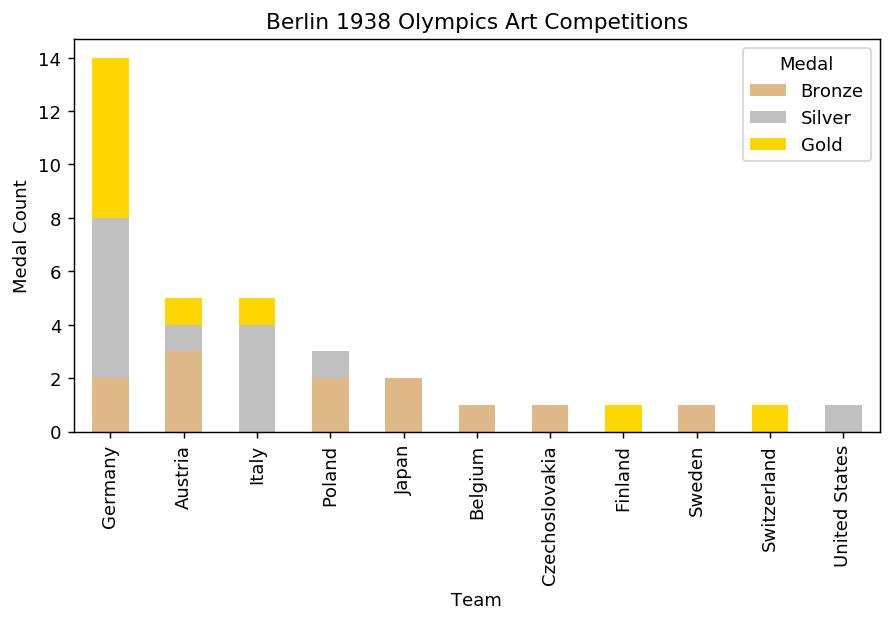

In [388]:
# stacked bar chart

# ordering by total medals 
total_medals = berlin_art_medals.sum(axis=1)
berlin_art_medals['total'] = total_medals
berlin_art_medals = berlin_art_medals.sort_values('total', ascending=False)
berlin_art_medals = berlin_art_medals[['Bronze', 'Silver', 'Gold']]

# plotting
berlin_art_medals.plot(kind='bar', stacked=True, color=['burlywood', 'silver', 'gold'])
plt.ylabel('Medal Count')
plt.title('Berlin 1938 Olympics Art Competitions')

### 1936 olympics, Berlin
* nazi 

In [409]:
berlin_df = events_df[events_df['Year']==1936]
berlin_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
94,31,Evald rma (rman-),M,24.0,174.0,70.0,Estonia,EST,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Pole Vault,NaN
124,45,Hakon Aasns,M,41.0,NaN,NaN,Norway,NOR,1936 Summer,1936,Summer,Berlin,Shooting,"Shooting Men's Small-Bore Rifle, Prone, 50 metres",NaN
125,46,Hans Aasns,M,33.0,194.0,93.0,Norway,NOR,1936 Summer,1936,Summer,Berlin,Shooting,"Shooting Men's Rapid-Fire Pistol, 25 metres",NaN
209,100,Oszkr Abay-Nemes,M,22.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Men's 100 metres Freestyle,NaN
210,100,Oszkr Abay-Nemes,M,22.0,NaN,NaN,Hungary,HUN,1936 Summer,1936,Summer,Berlin,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Bronze


In [410]:
# which sports did germany do best in?
berlin_df[(berlin_df['Team']=='Germany') & (berlin_df['Medal'].notnull())]['Sport'].value_counts()

Gymnastics           27
Rowing               26
Handball             22
Hockey               22
Athletics            22
Art Competitions     14
Fencing              13
Equestrianism        13
Water Polo           11
Canoeing             10
Swimming              8
Wrestling             7
Weightlifting         5
Boxing                5
Cycling               4
Alpine Skiing         4
Shooting              3
Diving                2
Modern Pentathlon     1
Figure Skating        1
Name: Sport, dtype: int64

# exploring missing values for height and weight

In [180]:
# number of participants
total_no = merged_df.groupby(['Year']).count()['ID']

# number of participants with height and weight data
total_no_with_hw = merged_df[(merged_df['Height'].notnull()) & (merged_df['Weight'].notnull())].groupby('Year')['ID'].count()

# total percentage of athletes with height and weight data
percent_with_hw = (total_no_with_hw/total_no) * 100

Text(0.5,1,'Height & Weight Data')

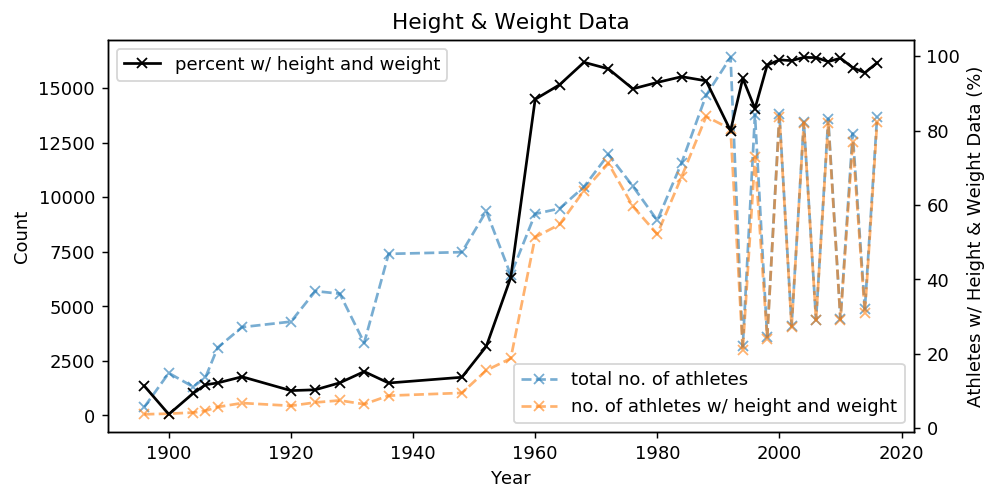

In [188]:
# plotting
fig, ax1 = plt.subplots()

ax1.plot(total_no, '--x', alpha=0.6, label='total no. of athletes')
ax1.plot(total_no_with_hw, '--x', alpha=0.6, label='no. of athletes w/ height and weight')
ax1.legend(loc='lower right')
ax1.set_ylabel('Count')
ax1.set_xlabel('Year')

ax2 = ax1.twinx()
ax2.plot(percent_with_hw, 'x-', label='percent w/ height and weight', color='k')
ax2.legend(loc='upper left')
ax2.set_ylabel('Athletes w/ Height & Weight Data (%)')

plt.title('Height & Weight Data')

# result: data for height and weight doesn't exist before ~1960
# so: any temporal analysis of height and weight should be done for data following 1960

In [201]:
merged_df['Height'].max()

226.0

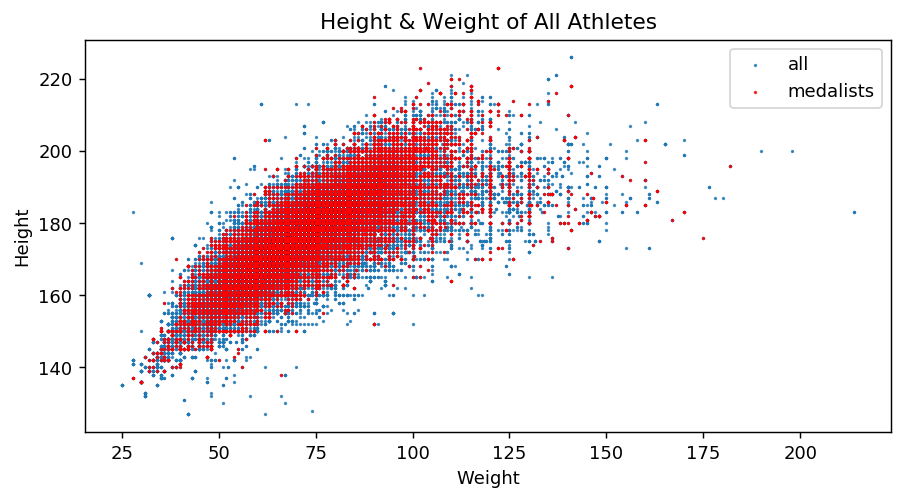

In [242]:
# plotting height and weight data

medalists = merged_df[(merged_df['Medal'].notnull())]

plt.title('Height & Weight of All Athletes')
plt.scatter(merged_df['Weight'], merged_df['Height'], marker='.', s=3, label='all', alpha=0.8)
plt.scatter(medalists['Weight'], medalists['Height'], marker='.', color='red', s=3, label='medalists', alpha=0.8)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.legend()

# mostly linear relationship
# greater variance in height as weight increases (vice-versa), naturally
# height and weight will vary for different sports

In [ ]:
# TODO: calculate the height/weight ratio and rank the sports where the athletes are succesful

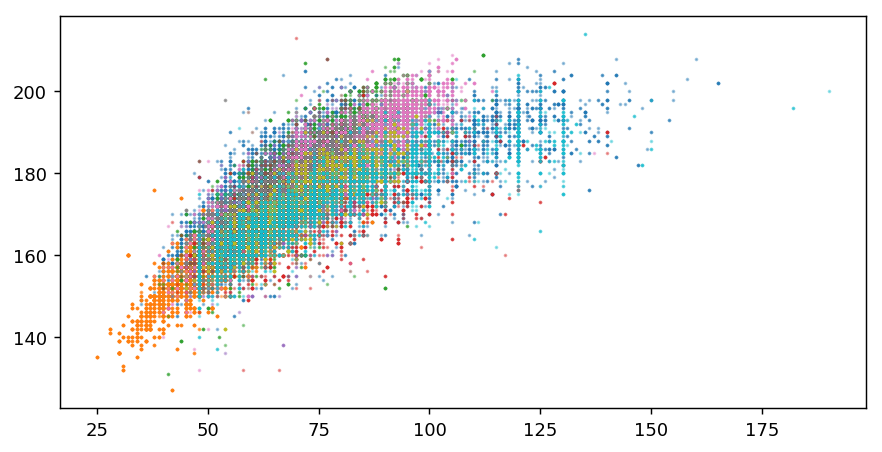

In [247]:
# taking top 10 most populace sports
top10_sports = merged_df['Sport'].value_counts().iloc[:10].index

for sport in top10_sports:
    data = merged_df[merged_df['Sport']==sport]
    plt.scatter(data['Weight'], data['Height'], marker='.', s=4, label=sport, alpha=0.4)

# plt.legend(prop={'size':8}, fontsize='large', handles=all_handles)